In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
random_state = 427

np.random.seed(random_state)

cap = np.vectorize(lambda v: min(4, max(0, v)))
N = 727 + 1
S, M, L = np.floor([N * 0.2, N * 0.3, N * 0.5]).astype(int)

In [22]:
data = {
  'student_id': range(1, S + M + L + 1),
  'GPA': cap(np.round(np.concatenate([
    np.random.normal(3.7, 0.2, M),
    np.random.normal(2.8, 0.3, L),
    np.random.normal(1.9, 0.2, S)
  ]), 2)),
  'study_hours': np.concatenate([
    np.random.randint(12, 20, M),
    np.random.randint(6, 12, L),
    np.random.randint(1, 6, S)
  ]),
  'attendance_rate': np.concatenate([
    np.random.randint(90, 100, M),
    np.random.randint(70, 90, L),
    np.random.randint(40, 70, S)
  ])
}

df = pd.DataFrame(data)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   student_id       727 non-null    int64  
 1   GPA              727 non-null    float64
 2   study_hours      727 non-null    int32  
 3   attendance_rate  727 non-null    int32  
dtypes: float64(1), int32(2), int64(1)
memory usage: 17.2 KB


,student_id,GPA,study_hours,attendance_rate
0,1,3.70,19,94
1,2,3.82,16,91
2,3,3.69,14,98
3,4,3.69,15,96
4,5,3.75,18,93


In [23]:
df.describe()

,student_id,GPA,study_hours,attendance_rate
count,727.000000,727.000000,727.000000,727.000000
mean,364.000000,2.891472,9.459422,78.713893
std,210.011111,0.686069,4.845343,15.312740
min,1.000000,1.340000,1.000000,40.000000
25%,182.500000,2.400000,6.000000,71.000000
50%,364.000000,2.900000,9.000000,81.000000
75%,545.500000,3.535000,13.000000,91.000000
max,727.000000,4.000000,19.000000,99.000000


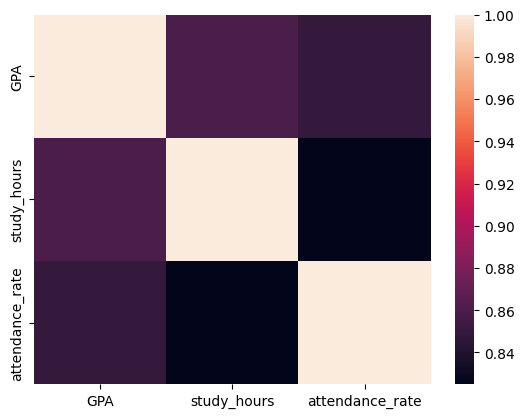

In [24]:
df_original = df.copy()
df.drop('student_id', axis=1, inplace=True)

sns.heatmap(df.corr())
plt.show()

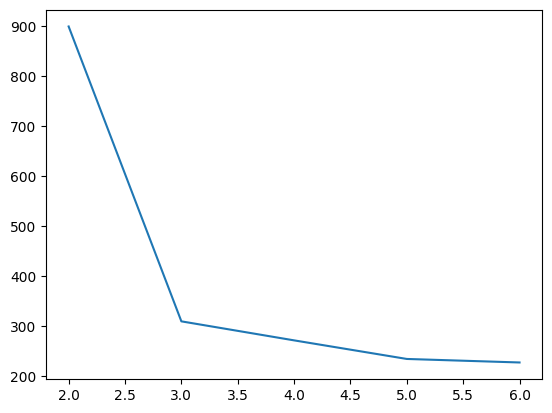

In [25]:
ss = StandardScaler()
df_scaled = ss.fit_transform(df)

wcss = []
for i in range(2, 7):
  model = KMeans(i, init='k-means++', random_state=random_state)
  model.fit(df_scaled)
  wcss.append(model.inertia_)

sns.lineplot(x=range(2,7), y=wcss)
plt.show()

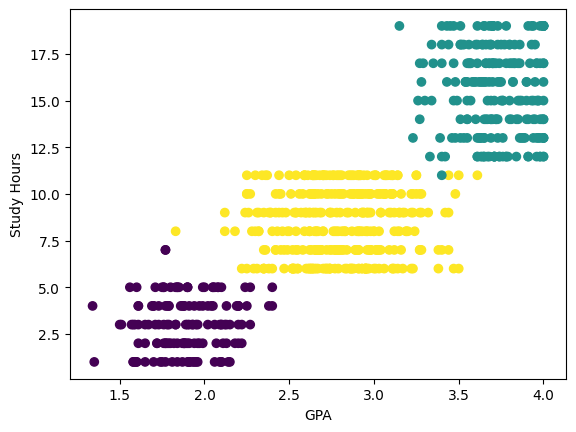

In [26]:
model = KMeans(3, init='k-means++', random_state=random_state)
predictions = model.fit_predict(df_scaled)

df['clusters'] = predictions


plt.scatter(x=df['GPA'], y=df['study_hours'], c=df['clusters'], cmap='viridis', label=df['clusters'].unique())
plt.xlabel('GPA')
plt.ylabel('Study Hours')
plt.show()

In [27]:

df_original['clusters'] = df['clusters']

values = df_original.values
np.random.shuffle(values)
pd.DataFrame(data=values, columns=df_original.columns).head(10)

,student_id,GPA,study_hours,attendance_rate,clusters
0,197.0,3.83,17.0,95.0,1.0
1,205.0,3.91,19.0,98.0,1.0
2,358.0,2.65,6.0,80.0,2.0
3,73.0,3.78,12.0,91.0,1.0
4,74.0,3.70,19.0,99.0,1.0
5,292.0,2.74,6.0,89.0,2.0
6,705.0,2.20,3.0,58.0,0.0
7,260.0,2.84,7.0,81.0,2.0
8,176.0,3.47,19.0,92.0,1.0
9,128.0,3.94,13.0,98.0,1.0
